# Crear un dataset de Fiftyone

In [ ]:
# !pip install fiftyone --quiet

In [ ]:
import os
import fiftyone as fo

In [ ]:
START_OVER = True

In [ ]:
if START_OVER:
    for ds in fo.list_datasets():
        fo.delete_dataset(ds)

# Importar imágenes

El dataset [LZUPSD](https://figshare.com/articles/figure/LZUPSD_A_Dataset_for_Fine-Grained_Seed_Recognition/23264912) se puede descargar desde el link.

### Prepare Data

EJERCICIO 0.1: Agregue las celdas de código necesarias para descargar y descomprimir el dataset LZUPSD, para que la versión final de los datos descomprimidos queden almacenados en el directorio "data/ds/seeds_img" relativo al proyecto.

EJERCICIO 0.2: Renombre todos los directorios de los nombres de clases para reemplazar los espacios por "_" eliminando y/o reemplazando todos los caracteres no legibles. (SPOILER ALERT: hay problemas con los nombres de archivos tal cual se descomprimen. Verificar y corregir cualquier problema)

EJERCICIO 0.3: Selecciones el contenido de al menos cinco subdirectorios de clase, y copie las imágenes a un nuevo directorio en "data/raw/seeds_img".

EJERCICIO 0.4: Ejecute las dos celdas de importación de las imágenes a dataset que se encuentran a continuación.

EJERCICIO 0.5: Explore las alternativas para abrir la App de fiftyone en una celda (ses.show()), y el freeze. Si ejecuta este notebook en un Colab o entorno similar, explore la posibilidad de [abrir la aplicación en una pestaña separada](https://docs.voxel51.com/environments/index.html#opening-the-app-in-a-dedicated-tab).

In [ ]:
base_dir = os.path.dirname(os.getcwd())

In [ ]:
data_path = os.path.join(base_dir, "data")
ds_path = os.path.join(data_path, "raw", "seeds_img")
ds_name = "seeds_img"

if fo.dataset_exists(ds_name):
    ds = fo.delete_dataset(ds_name)

# Creamos un dataset a partir de un directorio de imágenes
ds = fo.Dataset.from_dir(
    dataset_dir=ds_path,
    dataset_type=fo.types.ImageDirectory,
    name=ds_name,
    persistent=True
)
ds.compute_metadata(overwrite=True)


In [ ]:
# Si queremos iniciar la app de FiftyOne, podemos hacerlo así:
# ses = fo.launch_app(ds, auto=False) # Ingresar a http://localhost:5151 desde el navegador

# Muestra la sesión de FiftyOne en el notebook inline
# ses.show()

In [ ]:
# Convierte la vista actual de la aplicación en una captura (imagen) inline
# ses.freeze()

In [ ]:
# Cierra la sesión
# ses.close()

# Importar un dataset de clasificación

EJERCICIO 0.6: Importe el LZUPSD dataset. Verifique de utilizar la clase correcta para el tipo de dataset en este formato. Ver la celda de código correspondiente a "Importar Splits".

In [ ]:
# Ejercicio 0.6 aquí.

EJERCICIO 0.7: Genere lo splits correspondientes de "train", "val", y "test", utilizando las funciones provistas por el módulo fiftyone.utils.random. La estructura de directorios debe quedar en "data/ds/LZUPSD_SPLIT", con los correspondientess subdirectorios "train", "val", y "test".

In [ ]:
# Ejercicio 0.7 aquí

EJERCICIO 0.8: Evalúe la distribución de clases en las diferentes particiones (splits). ¿Qué particularida observa? (Pista: Ver Ejercicio 10)

Ingrese su respuesta aquí: <respuesta>

## Importar splits

Este directorio contiene la estructura con las particiones habituales -train,val, test- en subdirectorios, y cada subdirectorio alberga una clase como subdirectorio, siguiendo la convención para este tipo de anotaciones para clasificación.

In [ ]:
data_src_path = os.path.join(base_dir, "data/ds/LZUPSD_SPLIT")
splits = ["train", "val", "test"]

ds_name = "seeds_img_splits"

if fo.dataset_exists(ds_name):
    fo.delete_dataset(ds_name)

# Creamos un dataset vacío para almacenar los splits
ds = fo.Dataset(ds_name, persistent=True)

# Cargamos los splits y los añadimos al dataset
for split in splits:
    print(f"Processing {split} split...")
    ds_tmp = fo.Dataset.from_dir(
        name=f"{ds_name}_{split}",
        dataset_dir=os.path.join(data_src_path, split),
        dataset_type=fo.types.ImageClassificationDirectoryTree, # Directorio de clasificación de imágenes
        persistent=False,
        tags=[split],
    )
    ds.add_samples(ds_tmp)
    fo.delete_dataset(ds_tmp.name)

# Computamos la metadata de los samples y guardamos el dataset
ds.compute_metadata(overwrite=True)
ds.save()

## ¿Qué es un Fiftyone Dataset?

Es la representación en una estructura de datos propia del framework de un conjunto de datos (dataset).

In [ ]:
ds

Tiene un nombre, el tipo de dato principal que conforma los puntos de muestra (sample) del conjunto de datos, la cantidad de datos, etc.

Además, indica cuál es la estructura de datos o las propiedades de los objetos que componen cada muestra (sample) del conjunto de datos. Por definición, todas las muestras tienen los siguientes campos:
* **id**,
* un **filepath** (ruta al archivo de la muestra),
* **media_type** (tipo de archivo como imagen o video),
* **tags** (lista de maracaciones, inicialmente vacía),
* **metadata** (opcional),
* y las fechas de creación y modificación:  **created_at**, y **last_modified_at**

Como un conjunto de datos se compone una cantidad variable de ellos, podemos consultar cuántos datos hay, utilizando la primitiva de python len()

EJERCICIO 0.9: Cuále es la cantidad de imágenes que tiene el dataset?

In [ ]:
# Ejercicio 0.9 aquí

EJERCICIO 0.10: Cuántas imágenes tiene cada uno de los splits? (Ver Ejercicio 8)

In [ ]:
# Ejercicio 0.10 aquí

Entonces, podemos tomar el primero y analizar el contenido:

In [ ]:
sample = ds.first()
print(sample)

Por supuesto, se pueden acceder a los campos y a sus valores con la notación de punto, y como diccionario:

In [ ]:
sample["ground_truth"]
# sample.ground_truth

Vemos que el campo **"ground_truth"** (verdad objetiva) que es de tipo Classification, además de contar con un id para su identificación y la etiqueta (label) asignada, cuenta con los campos certeza (confidence), marcas (tags), y logits.

Las marcas (**tags**) son valores de cadena de texto (strings) que nos permitirán marcar las anotaciones, como en este caso una su pertenecia a un conjunto de entrenamiento, validación o prueba. No tienen un uso predefinido por fiftyone mas que permitirle al usuario marcar las anotaciones con múltiples valores (dado que es una lista) para facilitar el filtrado o selección de determinadas anotaciones de acuerdo a nuestras necesidades. Otro ejemplo de marcas para este conjunto de datos puede ser la condición de iluminación (día o noche), la planta, etc. En definitiva, cualquier valor que necesitemos para facilitar el filtrado de los datos para armar subconjuntos nuevos.
**OBSERVACION**: Notar que al momento de crear el dataset (celda 9, línea 17) se asignó una etiqueta con el nombre del sobconjunto (split) al que se asignó la muestra (sample), no la clasificación que se muestra arriba. Ver el resultado de la ejecución de la celda 12, para observar la maración "train" para la muestra en el campo "tags"

Las etiquetas (**labels**) son las que asigna la clase a la anotación. En nuestro caso, cada imagen puede estar anotada con una etiqueta "TOPE", "MEDIO", o "SIN".

La certeza (**confidence**) es valor que pondera la seguridad con el modelo ha logrado predecir la clase para la entrada. Habitualmente es el resultado de una función de distribución de probabilidad como una función Softmax, o Sigmoide, por ejemplo.

Los **logits** corresponden a los valores tal como se han obtenido de la última capa del modelo antes de la capa de clasificación, y pueden ser utilizados por fiftyone para calcular la dificultad de una muestra (sample) en el módulo de fiftyone Brain de acuerdo a un modelo cuando es requerido.

Excepto el id que es asignado automáticamente, todos los campos son opcionales.

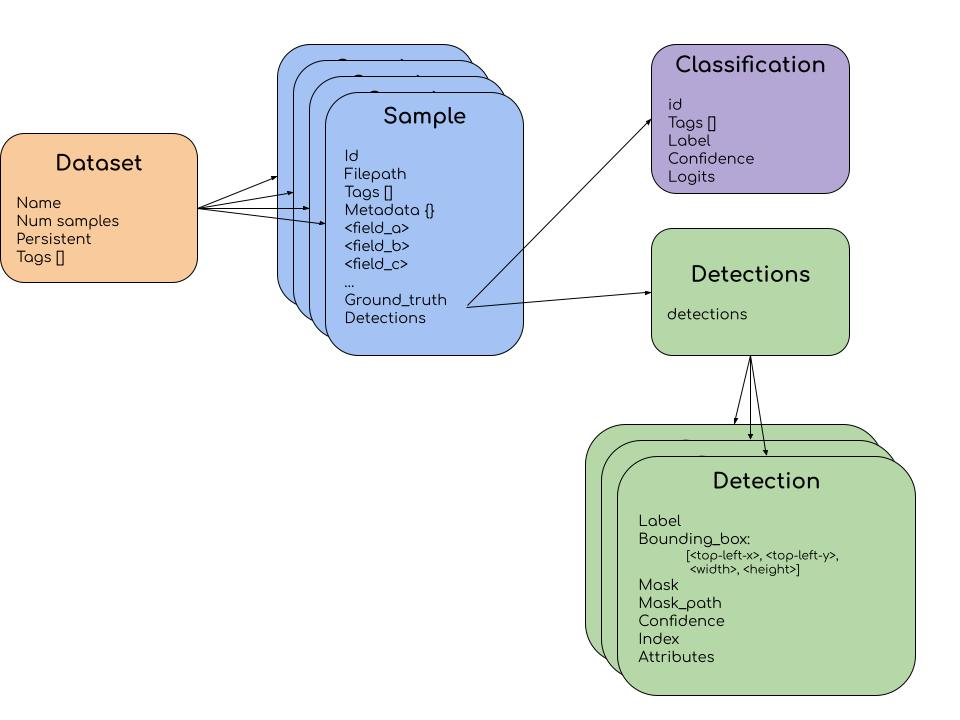

Como se muestra en el diagrama anterior, fiftyone permite además la representación para la localización y clasificación de objetos (detección de objetos) tanto como para cajas delimitadoras (bounding boxes) y segmentaciones de instancia.

Por supuesto, existes más clases para las etiquetas como puntos clave (keypoints), cuboides, cajas delimitadoras rotadas, detecciones 3d, etc, que se pueden consultar en la [documentación de fiftyone](https://docs.voxel51.com/user_guide/using_datasets.html#labels).

## Cómo acceder a las muestras

Quizás una de las cosas más contrintuitivas que tiene el framework es que no ofrece un acceso basado en índices numéricos como las listas de python, aunque sean iterables.

Las dos maneras directas de acceder a un sample específico del dataset son através del "filepath" y del "id" del sample:

In [ ]:
# Acceder a una muestra mediante su id
sample_by_id = ds[sample.id]
print("Sample obtenido por id:", sample_by_id)

# Acceder a una muestra mediante su filepath
sample_by_filepath = ds[sample.filepath]
print("Sample obtenido por filepath:", sample_by_filepath)

### Error al acceder por índice
Si intentamos acceder por índice a una muestra, obtendremos el error que se muestra a continuación:

```python
ds[0]
```

<pre style="margin: 0; overflow: auto; color: #777777; border: 0;">
<span style="color: #cc0000; font-weight: bold;">---------------------------------------------------------------------------</span>
<span style="color: #cc0000; font-weight: bold;">ValueError</span>                                Traceback (most recent call last)
<span style="color: #777777;">/tmp/ipykernel_40974/3903559858.py in ?()</span>
<span style="color: #777777;">----> 1</span> ds[0]

<span style="color: #777777;">/media/lucas/disk24/01.tecso/00.ia/00.prj/colloquia/iron_coil/data_wrangling/veFO/lib/python3.12/site-packages/fiftyone/core/dataset.py in ?(self, id_filepath_slice)</span>
<span style="color: #777777;">    373</span>     def __getitem__(self, id_filepath_slice):
<span style="color: #777777;">    374</span>         if isinstance(id_filepath_slice, numbers.Integral):
<span style="color: #777777;">---> 375</span>             raise ValueError(
<span style="color: #777777;">    376</span>                 "Accessing dataset samples by numeric index is not supported. "
<span style="color: #777777;">    377</span>                 "Use sample IDs, filepaths, slices, boolean arrays, or a "
<span style="color: #777777;">    378</span>                 "boolean ViewExpression instead"

<span style="color: #cc0000; font-weight: bold;">ValueError</span>: Accessing dataset samples by numeric index is not supported. Use sample IDs, filepaths, slices, boolean arrays, or a boolean ViewExpression instead
</pre>

### Un "truco"

Dado que el datset admite operaciones de recorte (slicing), para obtener la décima muestra podemos generar un recorte entre los índices 10 y 11, y obtener la primer muestra de la vista (view) generada a partir de la operación de recorte.

In [ ]:
ds[10:11].first()

### Iterando sobre las muestras

Es muy probable necesitemos acceder iterativamente a las muestras (samples) con diferentes motivos, desde acceder al archivo de imagen, hasta para evaluar algún dato de una anotación, cambiarlas o eliminarlas, por ejemplo.

In [ ]:
# Iterando el dataset al estilo python puro

for s in ds.take(5):
    print(s.id, s.ground_truth.label)

In [ ]:
# Utilizando el iterador de FiftyOne

for s in ds.take(5).iter_samples(progress=True):
    a = s.ground_truth.label

El método iter_samples() además de ofrecer la posibilidad mostrar una barra de progreso, también permite establecer si las muestras se deben autoguardar cuando son modificadas (autosave=True).

Esto es de vital importancia, dado que por defecto todas las moficiaciones son en memoria, y si estamos trabajando con un dataset persisente, es necesario guardar los cambios para que estos sean permanentes.

En el ejemplo de python puro, si se deseara persistir un cambio a la muestra, se debe explicitar llamando al método save() de la muestra:

```python
s.save()
```

mientras que para el ejemplo que utiliza iter_samples() se pasa el parámetro con valor True:

```python
for s in ds.take(5).iter_samples(progress=True, autosave=True):
    s.ground_truth.label =  "MEDIO"
```